In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

sns.set()

In [2]:
def wrangle(filename, encoding= None, dropna_columnnames = None, change_column_name = None, date_column = None, remove_duplicated_rows_columnsname = None):
    # Loading Data From csv file
    df = pd.read_csv(filename, encoding=encoding)
    
    # Get Orders NaN Rows
    df.dropna(subset= dropna_columnnames, inplace=True)
    
    # Rename Columns
    df = df.rename(columns = change_column_name)
    
    # Change Orderdate and ID Columns type to Date, integer
    df[date_column] = pd.to_datetime(df[date_column])

    # Drop duplicated Rows    
    df = df.drop_duplicates(subset = remove_duplicated_rows_columnsname)

    # Strip and Lowercase Columns names
    df.columns = df.columns.str.strip().str.lower()

    return df

In [3]:
orders = wrangle('all_data.csv', encoding= 'latin-1', dropna_columnnames=['OrderID'], change_column_name= {'City.1': 'SuppCity', 'Country.1': 'SuppCountry', 'Phone.1': 'SuppPhone'}, date_column= 'OrderDate', remove_duplicated_rows_columnsname=['OrderID'])

for cols in orders.columns:
    if 'id' in cols or 'ordernumber' in cols:
        orders[cols] = orders[cols].astype(int)

orders = orders[['customerid', 'firstname', 'lastname', 'city', 'country', 'orderid', 'ordernumber', 'orderdate', 'totalamount']]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    int64         
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    int64         
 6   ordernumber  830 non-null    int64         
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.8+ KB


In [4]:
orders.columns

Index(['customerid', 'firstname', 'lastname', 'city', 'country', 'orderid',
       'ordernumber', 'orderdate', 'totalamount'],
      dtype='object')

In [5]:
orders['totalamount'].describe()

count      830.00
mean     1,631.88
std      1,990.61
min         12.50
25%        480.00
50%      1,015.90
75%      2,028.65
max     17,250.00
Name: totalamount, dtype: float64

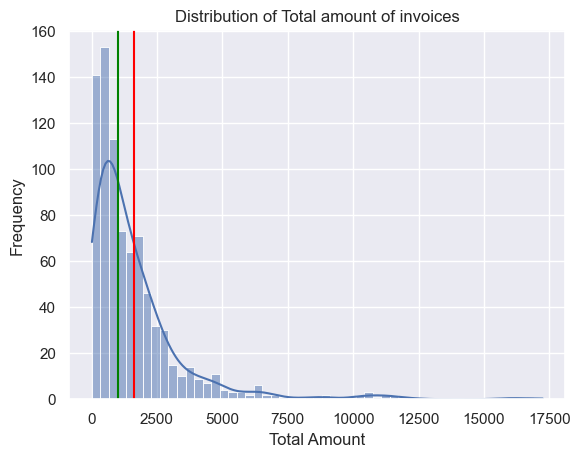

In [6]:
sns.histplot(data=orders, x='totalamount', kde= True)
plt.title('Distribution of Total amount of invoices')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.axvline(orders.totalamount.mean(), color='red')
plt.axvline(orders.totalamount.median(), color='green')

In [7]:
min = orders.totalamount.min()
q1 = orders.totalamount.quantile(0.25)
q2 = orders.totalamount.median()
q3 = orders.totalamount.quantile(0.75)

IQR = q3 - q1

LB = q1 - (1.5 * IQR)
UB = q3 + (1.5 * IQR)

<Axes: xlabel='totalamount'>

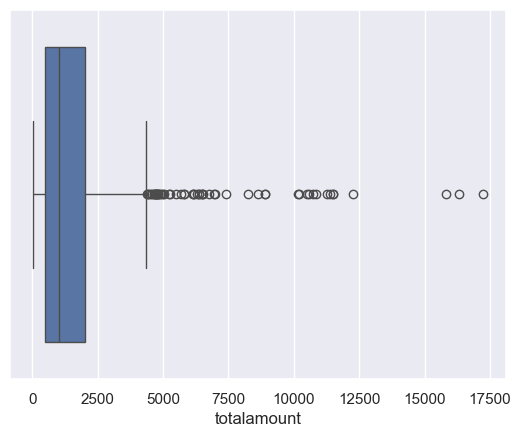

In [8]:
sns.boxplot(data = orders, x = 'totalamount')

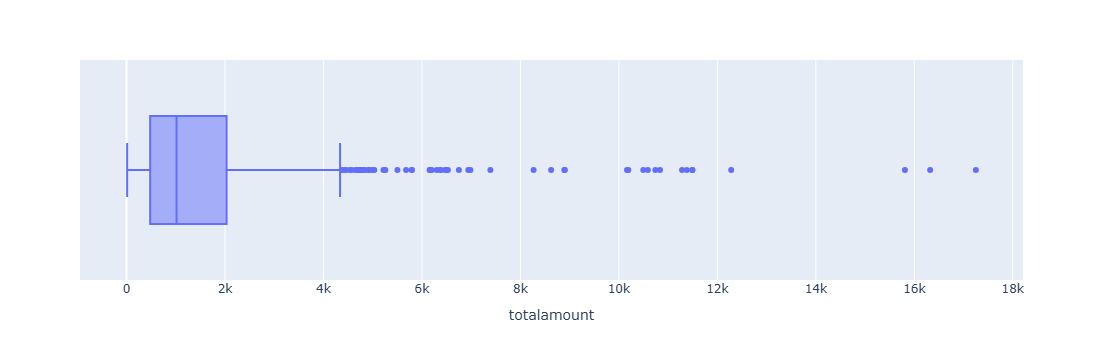

In [9]:
px.box(data_frame = orders, x= 'totalamount')

In [10]:
orders= orders[orders.totalamount < 15000 ]

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   827 non-null    int64         
 1   firstname    827 non-null    object        
 2   lastname     827 non-null    object        
 3   city         827 non-null    object        
 4   country      827 non-null    object        
 5   orderid      827 non-null    int64         
 6   ordernumber  827 non-null    int64         
 7   orderdate    827 non-null    datetime64[ns]
 8   totalamount  827 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.6+ KB


## Univariate Analysis

In [12]:
orders.city.value_counts()

city
London             46
Rio de Janeiro     33
Sao Paulo          31
Boise              30
Graz               30
México D.F.        28
Cunewalde          27
Br?cke             19
Cork               19
Lule?              18
Albuquerque        18
San Crist?bal      18
Marseille          17
Buenos Aires       16
München            15
Oulu               15
Frankfurt a.M.     15
Brandenburg        14
Seattle            14
Toulouse           14
Tsawassen          14
Barquisimeto       14
Montréal           13
Lisboa             13
Charleroi          12
Portland           12
Reggio Emilia      12
I. de Margarita    12
?rhus              11
Eugene             11
Strasbourg         11
Lyon               10
Bergamo            10
Stuttgart          10
Genève             10
Sevilla            10
Anchorage          10
Cowes              10
Salzburg           10
K?ln               10
Campinas            9
Lander              9
Resende             9
Bern                8
Madrid              8
Helsi

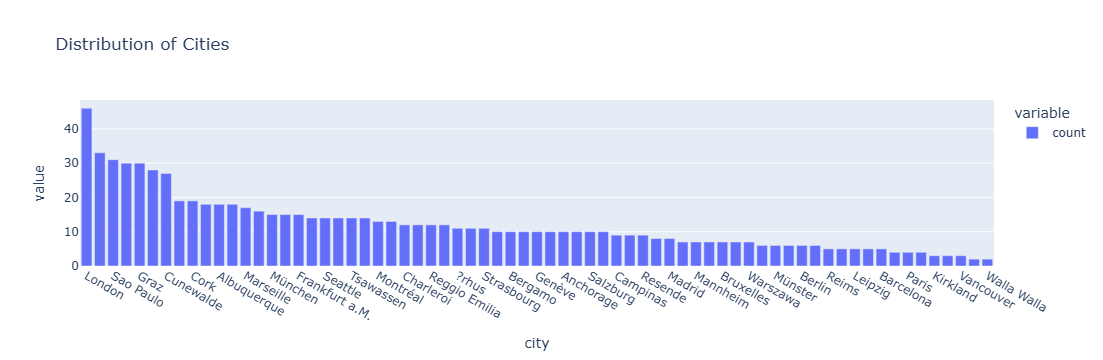

In [13]:
px.bar(data_frame = orders.city.value_counts(), title='Distribution of Cities')

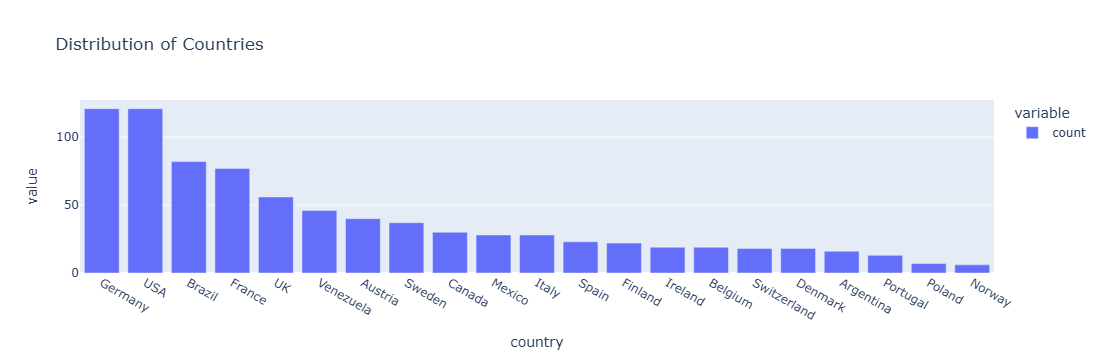

In [14]:
px.bar(data_frame = orders.country.value_counts(), title='Distribution of Countries')

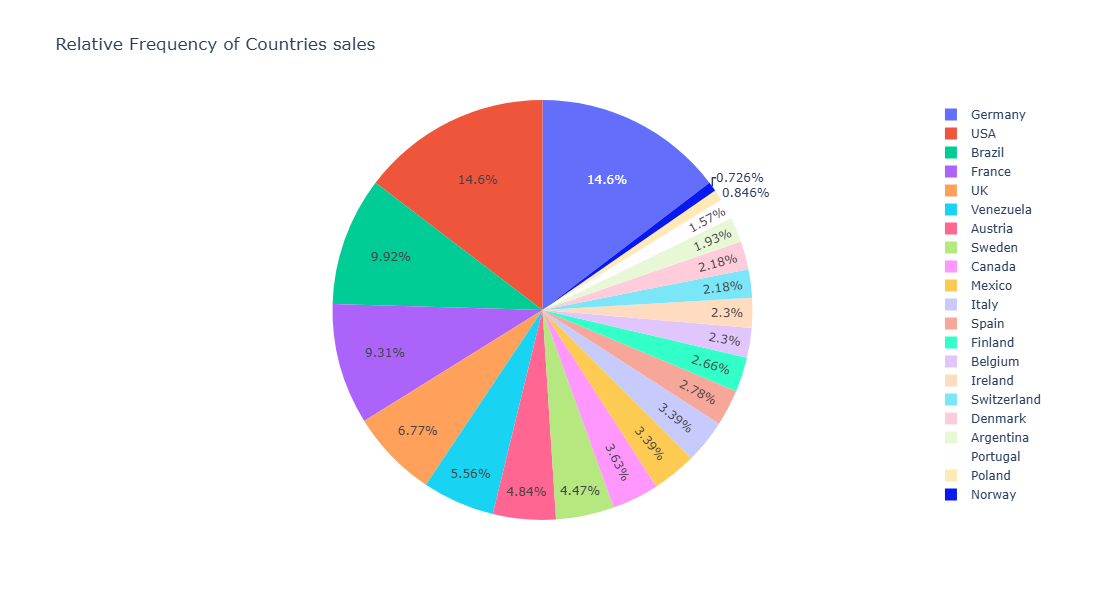

In [15]:
fig = px.pie(data_frame = orders, names= 'country', title= 'Relative Frequency of Countries sales',  width=800, height = 600 )  
fig.show()

## Bivariate Analysis

#### Countries Vs. Total Amount

#### Cities Vs. Total Amount

In [16]:
orders.groupby('country', as_index= False)['totalamount'].sum().sort_values('totalamount', ascending = False)

,country,totalamount
19,USA,"247,245.08"
8,Germany,"227,390.63"
1,Austria,"139,496.63"
3,Brazil,"99,158.48"
7,France,"85,498.76"
20,Venezuela,"60,814.89"
18,UK,"60,616.51"
16,Sweden,"59,523.70"
9,Ireland,"57,317.39"
4,Canada,"55,334.10"


In [17]:
def plots(columname, Top10=False):
    prop = orders.groupby(columname, as_index=False)['totalamount'].sum()  # غيرت prob لـ prop
    prop['proportion'] = (prop.totalamount / orders.totalamount.sum()) * 100
    prop = prop.sort_values('proportion', ascending=False)
    print('Describe of all Total Amount Values', prop.totalamount.describe())
    
    if Top10:
        prop = prop.head(10)


    fig1 = px.bar(data_frame = prop, x= columname, y= 'totalamount')
    fig2 = px.pie(data_frame = prop, names = columname, values='totalamount', width=800,
        height=600)
    
    fig1.show()
    fig2.show()
    

Describe of all Total Amount Values count        21.00
mean     62,146.51
std      67,460.19
min       3,531.95
25%      19,431.89
50%      35,134.98
75%      60,814.89
max     247,245.08
Name: totalamount, dtype: float64


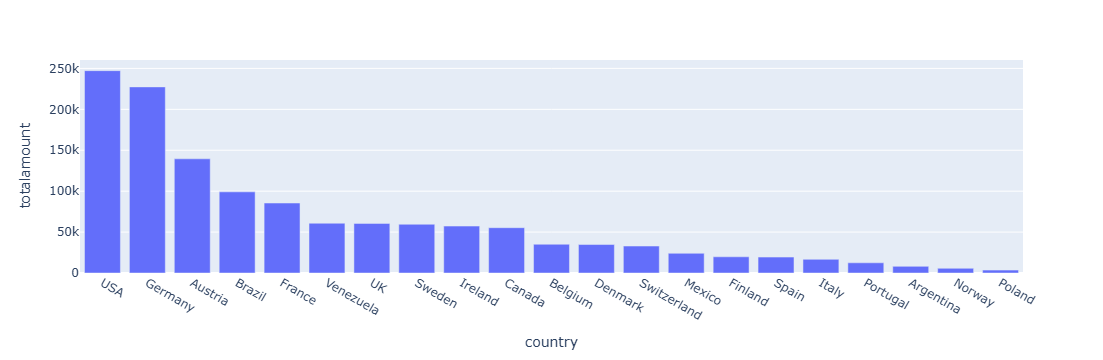

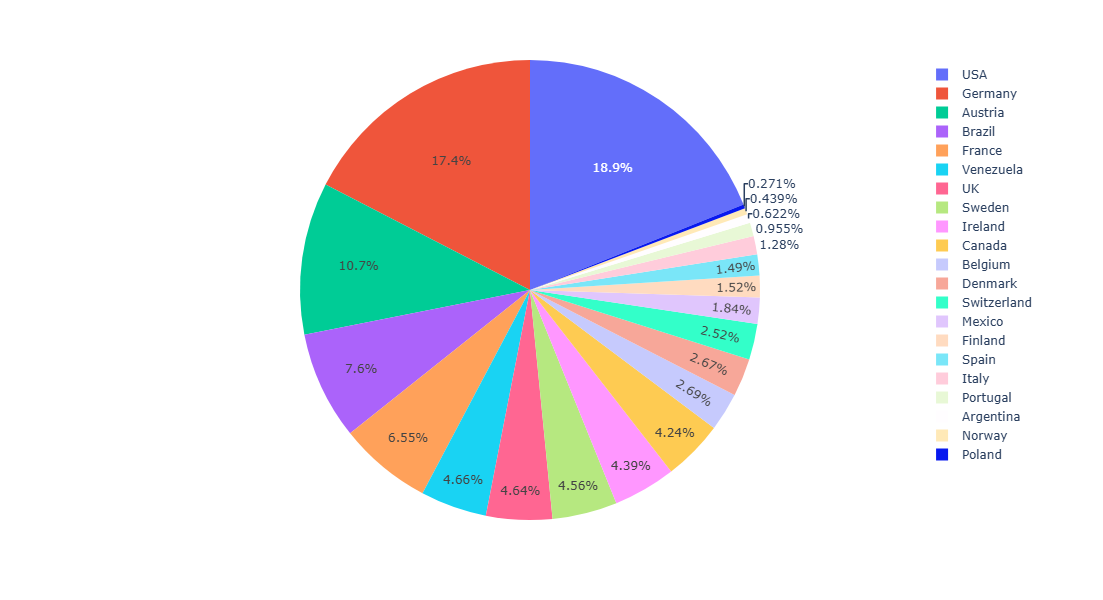

In [18]:
plots('country')

Describe of all Total Amount Values count        69.00
mean     18,914.15
std      22,692.99
min         357.00
25%       4,788.06
50%      11,830.10
75%      23,850.95
max     113,236.68
Name: totalamount, dtype: float64


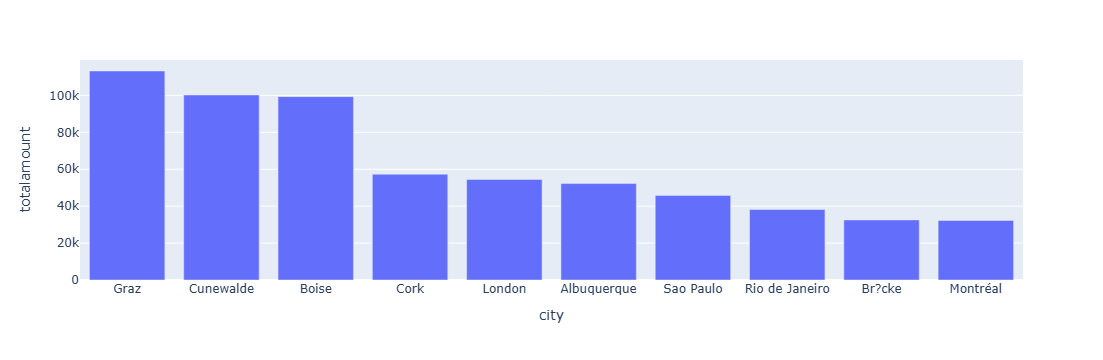

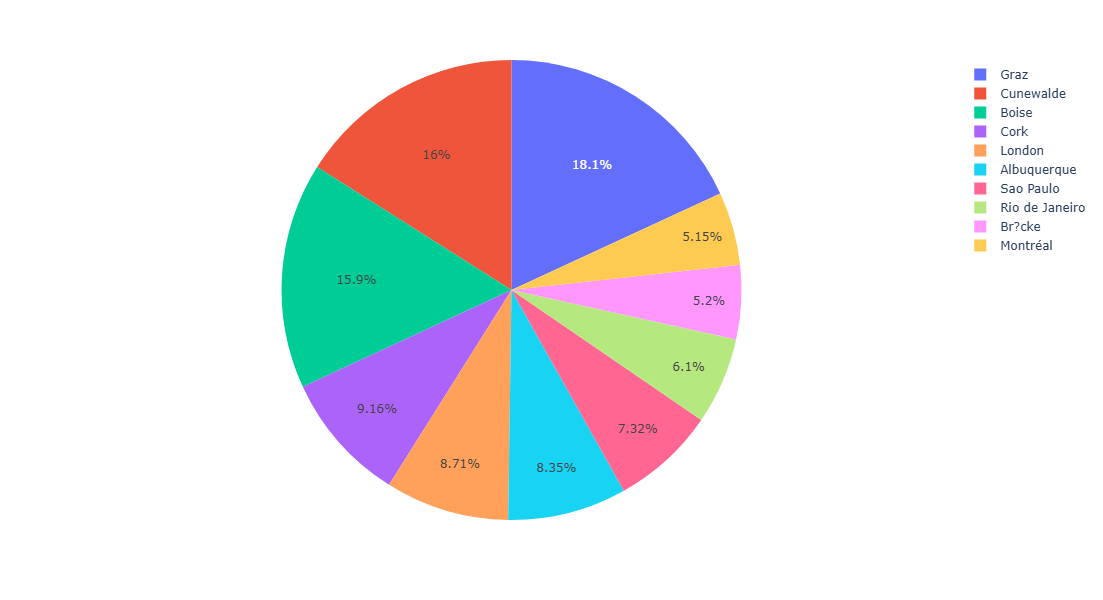

In [19]:
plots('city', True)

In [20]:
orders.groupby('city', as_index= False)['totalamount'].sum().sort_values('totalamount', ascending = False)

,city,totalamount
25,Graz,"113,236.68"
20,Cunewalde,"100,233.39"
9,Boise,"99,351.49"
18,Cork,"57,317.39"
35,London,"54,470.21"
2,Albuquerque,"52,245.90"
56,Sao Paulo,"45,786.37"
52,Rio de Janeiro,"38,189.18"
10,Br?cke,"32,555.55"
41,Montréal,"32,203.90"


### Orderdate Vs. Total Amount 

In [21]:
date_total = orders[['orderdate', 'totalamount']]
date_total = date_total.set_index('orderdate')

In [22]:
fig = px.line(data_frame = date_total, width=800, height=600)
fig.show()

### OrderDate and Country

In [23]:
date_country = orders[['orderdate', 'country']]
date_country = date_country.set_index('orderdate')
date_country = date_country.country.resample(rule = '1ME').nunique() ## group by month 1ME
date_country.head()

orderdate
2012-07-31    11
2012-08-31    11
2012-09-30    11
2012-10-31    13
2012-11-30    11
Freq: ME, Name: country, dtype: int64

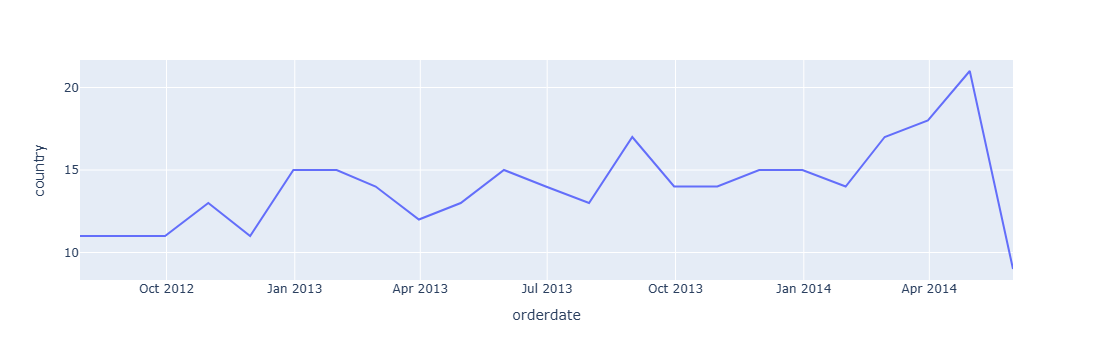

In [24]:
px.line(data_frame=date_country,y='country')

In [25]:
cust_orders = {
    'fullname' : orders.firstname + ' ' + orders.lastname,
    'totalamount' : orders.totalamount
}

cust_orders = pd.DataFrame(cust_orders)
cust_orders.sort_values('fullname').head()


,fullname,totalamount
1738,Alejandra Camino,365.89
89,Alejandra Camino,155.40
86,Alejandra Camino,86.50
1976,Alejandra Camino,361.00
156,Alejandra Camino,498.50


In [26]:
cust_orders.head()

,fullname,totalamount
0,Paul Henriot,440.00
3,Karin Josephs,"1,863.40"
5,Mario Pontes,"1,813.00"
8,Mary Saveley,670.80
11,Pascale Cartrain,"3,730.00"


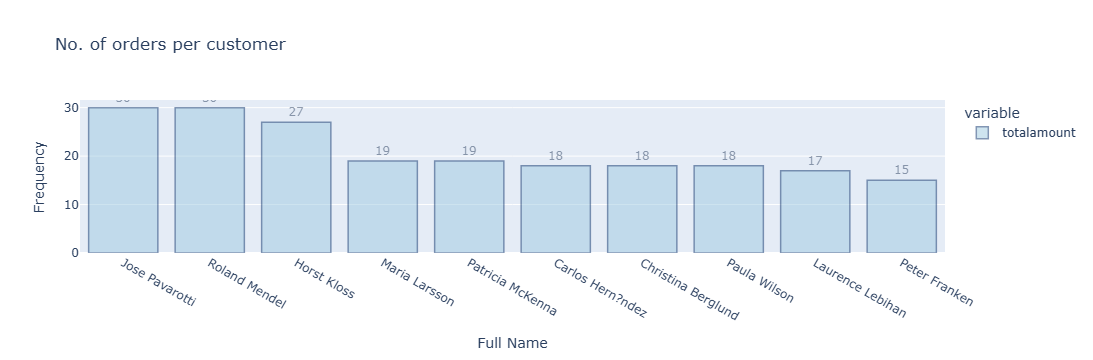

In [27]:
fig = px.bar(cust_orders.groupby('fullname')['totalamount'].count().sort_values(ascending=False).head(10),text_auto=True, title='No. of orders per customer',
             labels={'fullname': 'Full Name', 'value': 'Frequency'})
#Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                 marker_line_width=1.5, opacity=0.5, textposition = 'outside')

## Multivariate Analysis

In [29]:
orders.head()

,customerid,firstname,lastname,city,country,orderid,ordernumber,orderdate,totalamount
0,85,Paul,Henriot,Reims,France,1,542378,2012-07-04,440.00
3,79,Karin,Josephs,Münster,Germany,2,542379,2012-07-05,"1,863.40"
5,34,Mario,Pontes,Rio de Janeiro,Brazil,3,542380,2012-07-08,"1,813.00"
8,84,Mary,Saveley,Lyon,France,4,542381,2012-07-08,670.80
11,76,Pascale,Cartrain,Charleroi,Belgium,5,542382,2012-07-09,"3,730.00"


#### We Interested in Knowing the number of countries and the grand total amount of them per month

In [30]:
multivar = orders[['orderdate','country','totalamount']]
multivar = multivar.set_index('orderdate')
multivar.head()

,country,totalamount
orderdate,,
2012-07-04,France,440.00
2012-07-05,Germany,"1,863.40"
2012-07-08,Brazil,"1,813.00"
2012-07-08,France,670.80
2012-07-09,Belgium,"3,730.00"


In [31]:
multivar = multivar.resample('1ME').agg({'country': 'nunique', 'totalamount': 'sum'})
multivar.head()

,country,totalamount
orderdate,,
2012-07-31,11,"30,192.10"
2012-08-31,11,"26,609.40"
2012-09-30,11,"27,636.00"
2012-10-31,13,"41,203.60"
2012-11-30,11,"49,704.00"


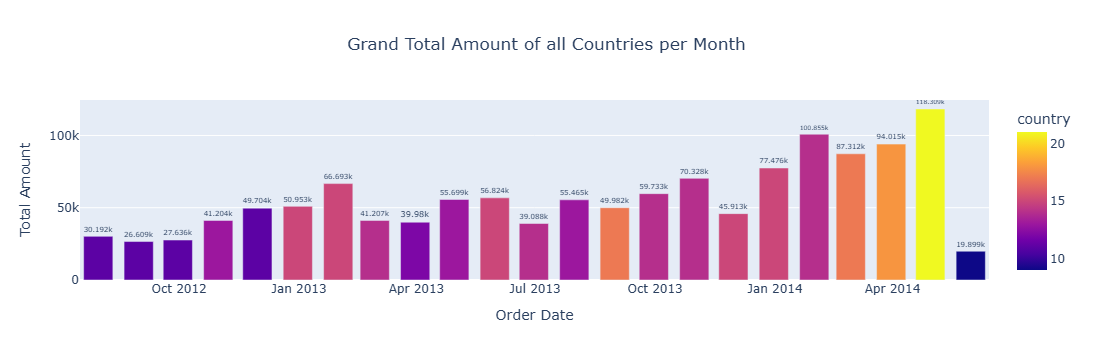

In [33]:
fig= px.bar(data_frame = multivar, x=multivar.index, y = round(multivar.totalamount,0), color= multivar.country, text_auto=True, title='Grand Total Amount of all Countries per Month',
           labels={'orderdate': 'Order Date', 'y': 'Total Amount'})
fig.update_traces(textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()

#### Grand total amount of each Country per month

In [34]:
multivar = orders[['orderdate','country','totalamount']]

In [35]:
multivar.head()

,orderdate,country,totalamount
0,2012-07-04,France,440.00
3,2012-07-05,Germany,"1,863.40"
5,2012-07-08,Brazil,"1,813.00"
8,2012-07-08,France,670.80
11,2012-07-09,Belgium,"3,730.00"


In [36]:
multivar.orderdate = multivar.orderdate.dt.to_period('M')

C:\Users\alhef\AppData\Local\Temp\ipykernel_12428\1183903935.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
multivar.head()

,orderdate,country,totalamount
0,2012-07,France,440.00
3,2012-07,Germany,"1,863.40"
5,2012-07,Brazil,"1,813.00"
8,2012-07,France,670.80
11,2012-07,Belgium,"3,730.00"


In [38]:
multivar = multivar.groupby(['orderdate', 'country'], as_index=False)['totalamount'].sum().sort_values(by='totalamount', ascending=False)
multivar.head()

,orderdate,country,totalamount
255,2014-01,USA,"27,594.45"
166,2013-07,USA,"26,022.30"
300,2014-04,Germany,"22,584.49"
249,2014-01,Germany,"22,135.55"
206,2013-10,Germany,"22,079.05"


In [39]:
multivar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 255 to 228
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   orderdate    322 non-null    period[M]
 1   country      322 non-null    object   
 2   totalamount  322 non-null    float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 10.1+ KB


In [40]:
multivar.orderdate = multivar.orderdate.astype('datetime64[ns]')

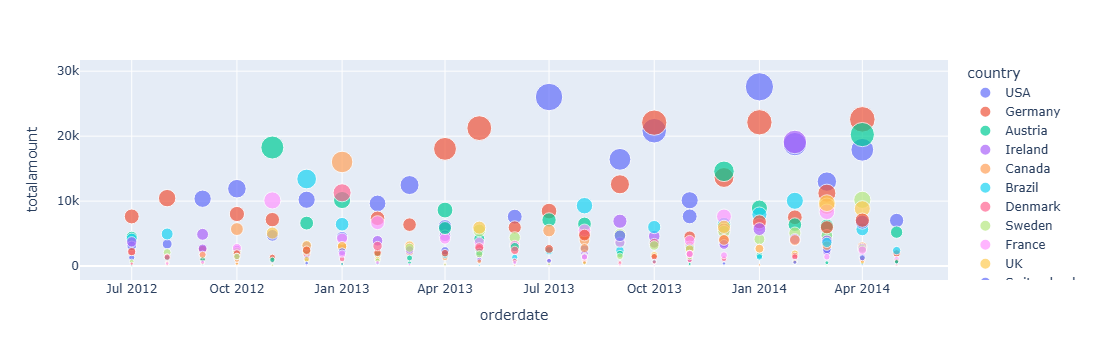

In [42]:
px.scatter(data_frame=multivar, x=multivar.orderdate, y='totalamount', color='country', size='totalamount')

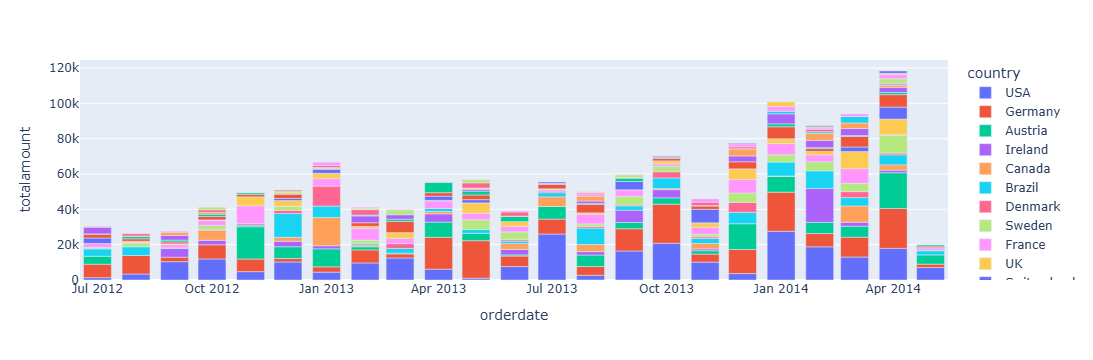

In [43]:
px.bar(data_frame=multivar, x=multivar.orderdate, y='totalamount', color='country')